In [3]:
import pandas as pd
import numpy as np

In [7]:
df_train = pd.read_csv("SOURCES/titanic_train.csv")
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
df_train["Alone"] = df_train["SibSp"] + df_train["Parch"]

In [9]:
df_train["Alone"].value_counts()

Alone
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [10]:
df_train.loc[df_train['Alone'].isin(list(range(1, 11))), 'Alone'] = 1

In [11]:
df_train["Alone"].value_counts()

Alone
0    537
1    354
Name: count, dtype: int64

In [12]:
df_train.drop(columns=["Name", "Ticket", "Cabin", "SibSp", "Parch"], inplace=True)

In [13]:
df_train.head()

PassengerId  Survived  Pclass     Sex   Age     Fare Embarked  Alone
0            1         0       3    male  22.0   7.2500        S      1
1            2         1       1  female  38.0  71.2833        C      1
2            3         1       3  female  26.0   7.9250        S      0
3            4         1       1  female  35.0  53.1000        S      1
4            5         0       3    male  35.0   8.0500        S      0

In [14]:
df_train.loc[df_train['Sex'].isin(["male"]), 'Sex'] = 1
df_train.loc[df_train['Sex'].isin(["female"]), 'Sex'] = 2
# df_train.replace({"male":1, "female":2}, inplace=True)
df_train.loc[df_train['Embarked'].isin(["S"]), 'Embarked'] = 1
df_train.loc[df_train['Embarked'].isin(["C"]), 'Embarked'] = 2
df_train.loc[df_train['Embarked'].isin(["Q"]), 'Embarked'] = 3
# df_train.replace({"S":1, "C":2, "Q":3}, inplace=True)

In [15]:
df_train.head()

PassengerId  Survived  Pclass Sex   Age     Fare Embarked  Alone
0            1         0       3   1  22.0   7.2500        1      1
1            2         1       1   2  38.0  71.2833        2      1
2            3         1       3   2  26.0   7.9250        1      0
3            4         1       1   2  35.0  53.1000        1      1
4            5         0       3   1  35.0   8.0500        1      0

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   Alone        891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
embarked_top = df_train["Embarked"].describe().loc["top"]
embarked_top

1

In [18]:
age_median = df_train["Age"].median()
age_median

28.0

In [19]:
df_train.loc[df_train['Embarked'].isin([np.nan]), 'Embarked'] = embarked_top
df_train.loc[df_train['Age'].isin([np.nan]), 'Age'] = age_median

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Alone        891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
df_train.head()

PassengerId  Survived  Pclass Sex   Age     Fare Embarked  Alone
0            1         0       3   1  22.0   7.2500        1      1
1            2         1       1   2  38.0  71.2833        2      1
2            3         1       3   2  26.0   7.9250        1      0
3            4         1       1   2  35.0  53.1000        1      1
4            5         0       3   1  35.0   8.0500        1      0

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
df0 = df_train[df_train["Survived"]==0]
df1 = df_train[df_train["Survived"]==1]

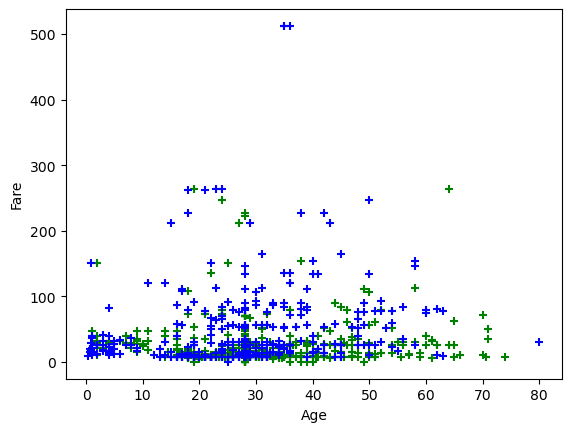

In [24]:
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(df0["Age"], df0["Fare"], color="green", marker="+")
plt.scatter(df1["Age"], df1["Fare"], color="blue", marker="+")

In [25]:
df_train.head()

PassengerId  Survived  Pclass Sex   Age     Fare Embarked  Alone
0            1         0       3   1  22.0   7.2500        1      1
1            2         1       1   2  38.0  71.2833        2      1
2            3         1       3   2  26.0   7.9250        1      0
3            4         1       1   2  35.0  53.1000        1      1
4            5         0       3   1  35.0   8.0500        1      0

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df_train.drop(columns=["PassengerId", "Survived"])
X.head()

Pclass Sex   Age     Fare Embarked  Alone
0       3   1  22.0   7.2500        1      1
1       1   2  38.0  71.2833        2      1
2       3   2  26.0   7.9250        1      0
3       1   2  35.0  53.1000        1      1
4       3   1  35.0   8.0500        1      0

In [28]:
y = df_train["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.svm import SVC

# 1. Model

In [31]:
model = SVC()

model.fit(X_train, y_train)

print(model.get_params())

model.score(X_test, y_test)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


0.6312849162011173

# 2. Model (according to "C" param)

In [242]:
my_list = []
for i in list(range(1, 1000)):
    model = SVC(C=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    my_list.append(round(score, 3))

In [243]:
my_list

[0.654,
 0.654,
 0.654,
 0.659,
 0.659,
 0.659,
 0.659,
 0.676,
 0.687,
 0.687,
 0.693,
 0.698,
 0.704,
 0.704,
 0.698,
 0.698,
 0.709,
 0.709,
 0.709,
 0.721,
 0.732,
 0.732,
 0.732,
 0.737,
 0.743,
 0.749,
 0.754,
 0.771,
 0.765,
 0.777,
 0.771,
 0.777,
 0.782,
 0.788,
 0.799,
 0.804,
 0.816,
 0.81,
 0.804,
 0.821,
 0.821,
 0.827,
 0.832,
 0.821,
 0.816,
 0.816,
 0.81,
 0.816,
 0.816,
 0.804,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.793,
 0.799,
 0.799,
 0.799,
 0.799,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.793,
 0.799,
 0.799,
 0.799,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0

In [245]:
max_score = sorted(my_list, reverse=True)[0]
max_score

0.832

In [248]:
C = my_list.index(max_score) + 1
C

43

In [163]:
model = SVC(C=C)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8324022346368715

# 2. Model (according to "gamma" param)

In [180]:
my_list = []
gamma_list = np.arange(0.01,1, 0.001)

for i in (gamma_list):
    i = round(i, 3)
    model = SVC(gamma=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    my_list.append(round(score, 3))

In [256]:
max_score = sorted(my_list, reverse=True)[0]
max_score

0.754

In [258]:
max_score_index = my_list.index(max_score)
max_score_index

103

In [259]:
gamma = gamma_list[max_score_index]
gamma

0.1129999999999999

In [262]:
model = SVC(gamma=gamma)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7541899441340782

# 3. Model (according to "C" and "gamma" params)

In [98]:
# Cs = np.arange(1, 1001)

In [99]:
# gammas = np.arange(0.001, 1.001, 0.001)

In [100]:
Cs = np.arange(1, 11)
len(Cs)

10

In [101]:
gammas = np.round(np.arange(0.001, 0.011, 0.001), 3)
len(gammas)

10

In [102]:
c_g = np.column_stack((Cs, gammas))

In [103]:
my_list = []
for C, gamma in c_g:
    model = SVC(C=C, gamma=gamma)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    my_list.append(round(score, 3))

In [104]:
my_list

[0.67, 0.676, 0.665, 0.687, 0.777, 0.793, 0.788, 0.804, 0.799, 0.799]

In [184]:
Cs = np.array(list(range(1, 1001)) * 1000)
Cs.sort()
len(Cs)

1000000

In [187]:
gammas = np.array(list(np.round(np.arange(0.001, 1.001, 0.001), 3)) * 1000)
len(gammas)

1000000

In [196]:
gammas[0]

0.001

In [197]:
c_g = np.column_stack((Cs, gammas))

In [ ]:
my_list = []
for C, gamma in c_g:
    model = SVC(C=C, gamma=gamma)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    my_list.append(round(score, 3))

In [179]:
sorted(my_list, reverse=True)

[0.81,
 0.81,
 0.81,
 0.81,
 0.81,
 0.81,
 0.81,
 0.81,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
